Enter acquisition cost: 500000
Enter annual incoming: 100000
Enter annual outgoing: 5000
Enter salvage value: 50000
Enter service life (in years): 10
Enter interest rate: 12


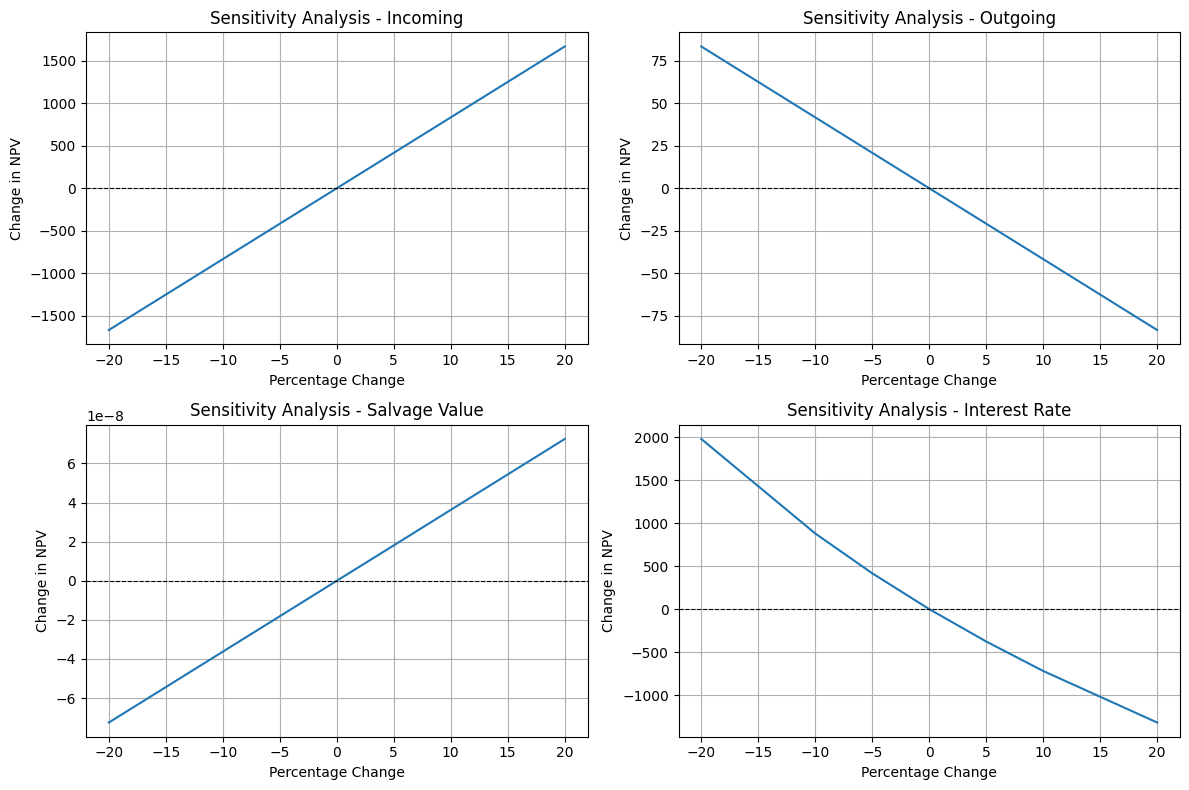

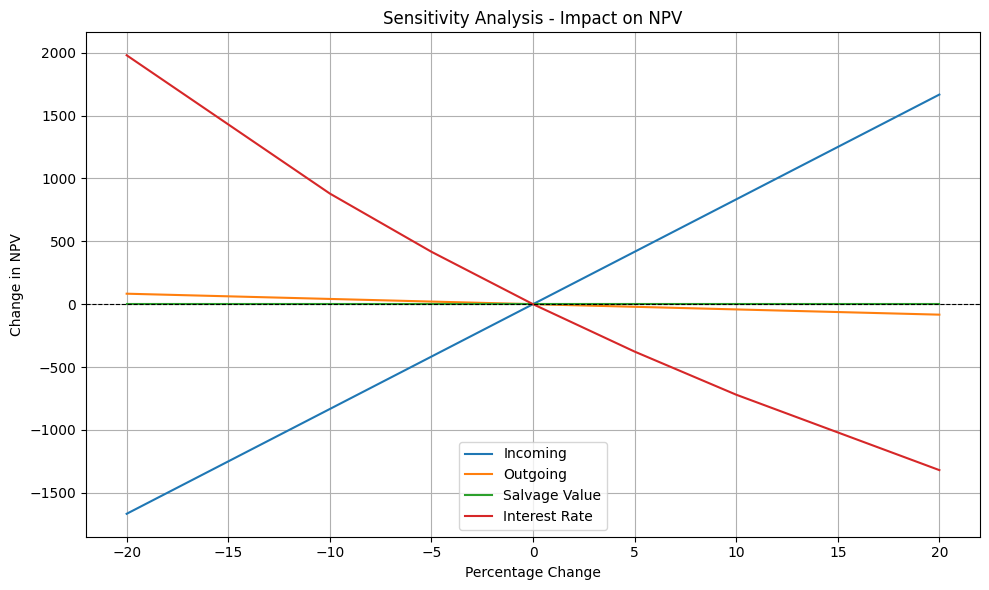

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Define the analysis function
def calculate_npv(acquisition_cost, annual_incoming, annual_outgoing, salvage_value, service_life, interest_rate):
    cashflows = [-acquisition_cost]  # Initial investment (negative)
    
    for year in range(1, service_life + 1):
        net_cashflow = annual_incoming - annual_outgoing
        cashflows.append(net_cashflow / (1 + interest_rate)**year)
    
    cashflows[-1] += salvage_value / (1 + interest_rate)**service_life  # Add salvage value in the final year
    
    npv = np.sum(cashflows)
    return npv

# Define parameter ranges
acquisition_cost_range = np.linspace(0, 1000000, 5)
annual_incoming_range = np.linspace(0, 1000000, 10)
annual_outgoing_range = np.linspace(0, 1000000, 10)
salvage_value_range = np.linspace(0, 1000000, 10)
service_life_range = np.arange(0, 15, 1)
interest_rate_range = np.linspace(0.01, 0.95, 3)

# Get user input
acquisition_cost = float(input("Enter acquisition cost: "))
annual_incoming = float(input("Enter annual incoming: "))
annual_outgoing = float(input("Enter annual outgoing: "))
salvage_value = float(input("Enter salvage value: "))
service_life = int(input("Enter service life (in years): "))
interest_rate = float(input("Enter interest rate: "))


# Perform sensitivity analysis using predefined parameter ranges
npv_values = np.zeros(
    (len(acquisition_cost_range), len(annual_incoming_range), len(annual_outgoing_range),
    len(salvage_value_range), len(service_life_range), len(interest_rate_range))
)

for i, ac in enumerate(acquisition_cost_range):
    for j, ai in enumerate(annual_incoming_range):
        for k, ao in enumerate(annual_outgoing_range):
            for l, sv in enumerate(salvage_value_range):
                for m, sl in enumerate(service_life_range):
                    for n, ir in enumerate(interest_rate_range):
                        npv = calculate_npv(ac, ai, ao, sv, sl, ir)
                        npv_values[i, j, k, l, m, n] = npv

# Define the percentage change values
percentage_changes = np.array([-20, -10, -5, 0, 5, 10, 20]) / 100

# Calculate original NPV
original_npv = calculate_npv(acquisition_cost, annual_incoming, annual_outgoing, salvage_value, service_life, interest_rate)

# Calculate NPV changes for each variable

variables = ['Incoming', 'Outgoing', 'Salvage Value', 'Interest Rate']
npv_changes = []

for i, pct_change in enumerate(percentage_changes):
    npv_changes_per_variable = []
    for var in variables:
        if var == 'Incoming':
            npv_change = calculate_npv(acquisition_cost, annual_incoming * (1 + pct_change), annual_outgoing, salvage_value, service_life, interest_rate) - original_npv
        elif var == 'Outgoing':
            npv_change = calculate_npv(acquisition_cost, annual_incoming, annual_outgoing * (1 + pct_change), salvage_value, service_life, interest_rate) - original_npv
        elif var == 'Salvage Value':
            npv_change = calculate_npv(acquisition_cost, annual_incoming, annual_outgoing, salvage_value * (1 + pct_change), service_life, interest_rate) - original_npv
        else:
            npv_change = calculate_npv(acquisition_cost, annual_incoming, annual_outgoing, salvage_value, service_life, interest_rate * (1 + pct_change)) - original_npv
        npv_changes_per_variable.append(npv_change)
    
    npv_changes.append(npv_changes_per_variable)

# Plot the Sensitivity graph
plt.figure(figsize=(12, 8))

for i, var in enumerate(variables):
    plt.subplot(2, 2, i+1)
    plt.plot(percentage_changes * 100, [row[i] for row in npv_changes])
    plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
    plt.xlabel("Percentage Change")
    plt.ylabel("Change in NPV")
    plt.title(f"Sensitivity Analysis - {var}")
    plt.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

for i, var in enumerate(variables):
    plt.plot(percentage_changes * 100, [row[i] for row in npv_changes], label=var)

plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel("Percentage Change")
plt.ylabel("Change in NPV")
plt.title("Sensitivity Analysis - Impact on NPV")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
